<a href="https://colab.research.google.com/github/SamuilMladenov/LearnPyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

End-to-end workflow

##Steps To Cover

1. Prepare and Load the Data
2. Build the Model
3. Fit the Model to the Data
4. Make Predictions and Evaluate Model
5. Saveing and Loading the Model
6. Putting it all together

In [1]:
import torch
from torch import nn #nn contains all of Pytorch's buuilding blocks for neural networks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Data (prepaaring and loading)

Data can be anything in machine learning.

1. Excel Spreadsheet
2. IMages of any kind
3. Videos
4. Audio
5. Even
6. Text

Amchine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this. let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight* X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into training adn test sets (one of the most important concepts in machine learing in general)

Let's create a training and test set with our data

In [4]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
    PLots training data, test data  and compares predictions
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

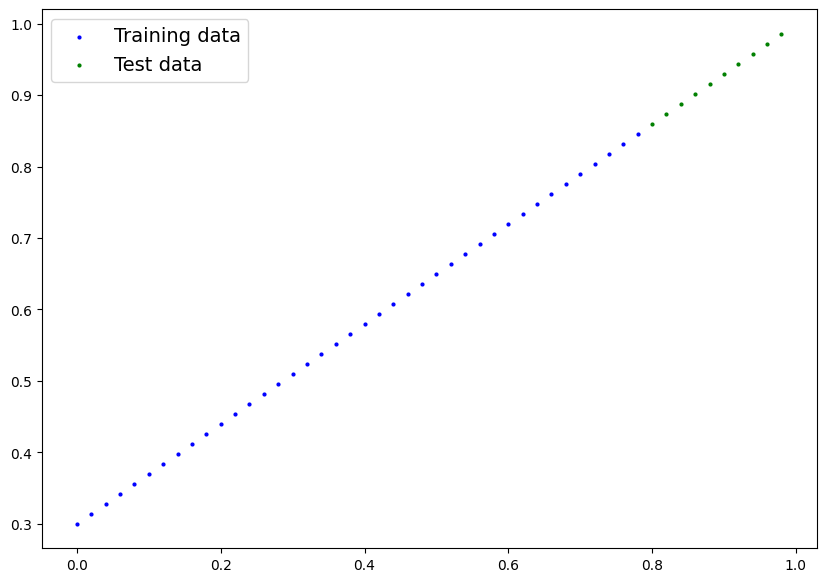

In [7]:
plot_predictions()

## 2. Build Model
My first PyTorch Model!

What the model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias we used to create our data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagantion

In [8]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module (imagine it as lego building bricks of models)
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- x is the input data
    return self.weight * x + self.bias # this is the linear regression formula

### Pytorch Model Building Essentials

* torch.nn - contains all of the buildings for computational graphs(neural networks can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descend
* def forward() - All nn.Module subclasses require to overwrite forward(), this method defines what happens in the forward computaion

### Checking the contents of our pytorch model

We can check our model parameters or what's inside our model using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(43)

# Create an instance of our model (this is a subclass of nn.Model)
model_0 =  LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

### Making prediction using `torch.infrance_mode`

To Check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through out model, it's going to run it through the `forward()` method


In [11]:
# Make predictions with model (if you want to read more what inference mode is https://twitter.com/PyTorch/status/1437838231505096708?lang=en)
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[-1.2246],
        [-1.2375],
        [-1.2505],
        [-1.2635],
        [-1.2764],
        [-1.2894],
        [-1.3024],
        [-1.3153],
        [-1.3283],
        [-1.3413]])

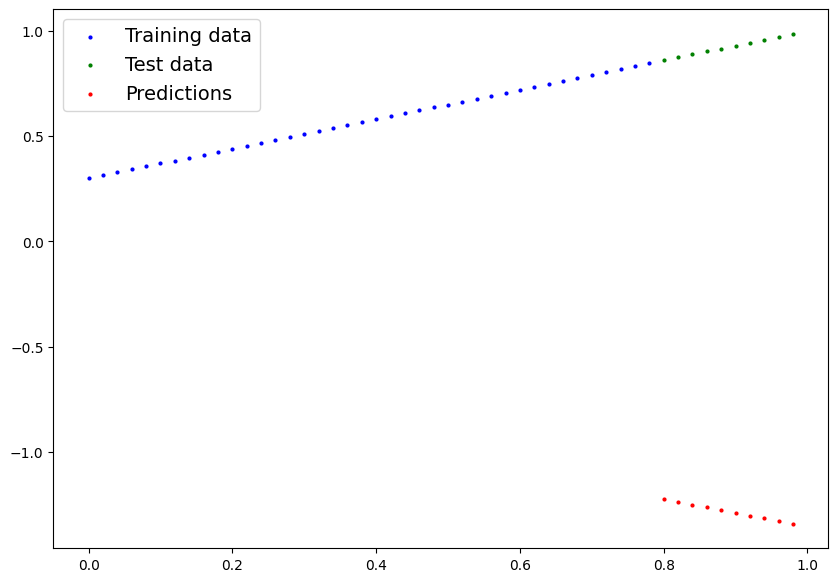

In [12]:
plot_predictions(predictions=y_preds)

## 3 Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

In other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas.

Thing's we need to train

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [13]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr = learning rate = possibly the most important important hyperperameter you can set

### Building a train and testing loops in PyTorch

In a training loop we need:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) also called forward propagation - to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect of the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [14]:
torch.manual_seed(43)

# An epoch is one loop through the data
epochs = 1200

#Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all the parameters that require gradients to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() #turns off different setting in the model not needed for the evaluation/testing
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out info
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 1.5317178964614868 | Test loss: 2.1924471855163574
OrderedDict([('weight', tensor([-0.6445])), ('bias', tensor([-0.6958]))])
Epoch: 100 | Loss: 0.3796185553073883 | Test loss: 0.8453486561775208
OrderedDict([('weight', tensor([-0.2545])), ('bias', tensor([0.3042]))])
Epoch: 200 | Loss: 0.1364736258983612 | Test loss: 0.33174824714660645
OrderedDict([('weight', tensor([0.0198])), ('bias', tensor([0.5737]))])
Epoch: 300 | Loss: 0.10186795145273209 | Test loss: 0.23734843730926514
OrderedDict([('weight', tensor([0.1949])), ('bias', tensor([0.5122]))])
Epoch: 400 | Loss: 0.06752245873212814 | Test loss: 0.15737101435661316
OrderedDict([('weight', tensor([0.3657])), ('bias', tensor([0.4402]))])
Epoch: 500 | Loss: 0.03318145126104355 | Test loss: 0.07670623809099197
OrderedDict([('weight', tensor([0.5367])), ('bias', tensor([0.3687]))])
Epoch: 600 | Loss: 0.0025017051957547665 | Test loss: 0.008199160918593407
OrderedDict([('weight', tensor([0.6984])), ('bias', tensor([0.309

In [15]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

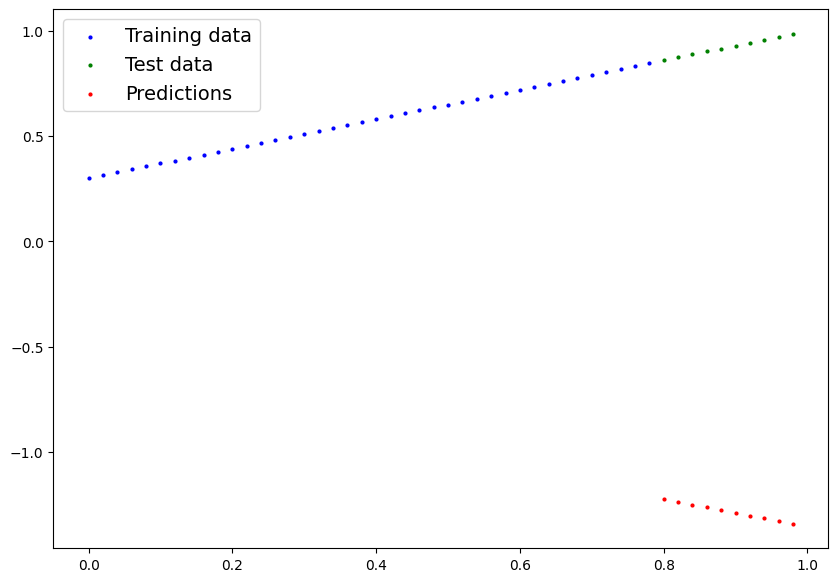

In [16]:
# Reminder how bad our results were before training.
plot_predictions(predictions=y_preds)

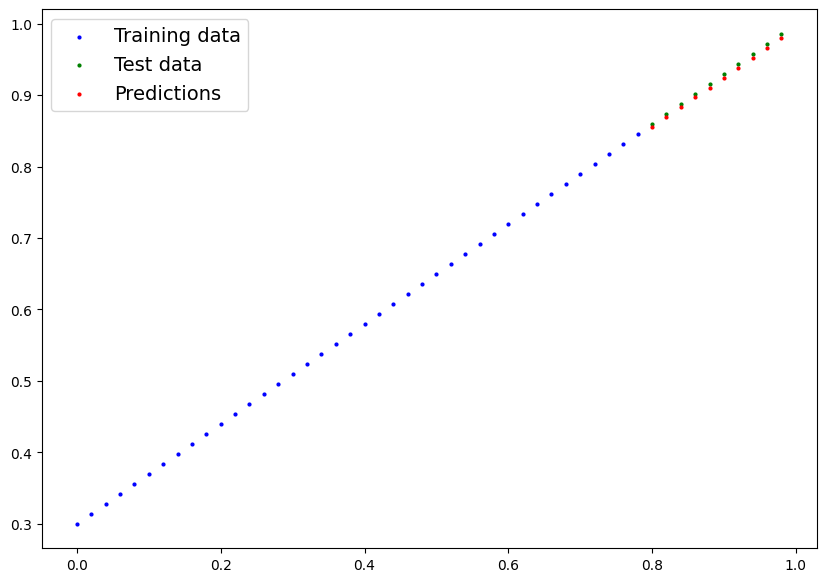

In [17]:
# Results after 400+ epochs
plot_predictions(predictions=y_preds_new)

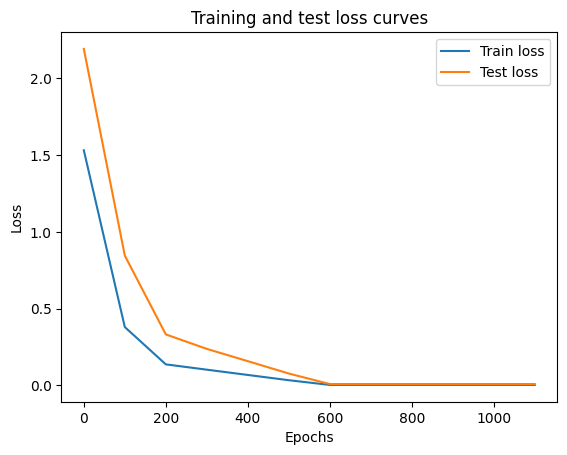

In [18]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

There are three main method for sacing and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.module.load_state_dict()` - this allows to load a model's saved state dictionary  

In [19]:
# Saving out PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth


In [20]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jan 17 20:18 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since only the `state_dict()` of our model is saved rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [21]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6945])), ('bias', tensor([0.2997]))])

In [24]:
#Make some predictiosn with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8552],
        [0.8691],
        [0.8830],
        [0.8969],
        [0.9108],
        [0.9247],
        [0.9386],
        [0.9525],
        [0.9663],
        [0.9802]])

In [26]:
# Make some model preds with our model before we saved it
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8552],
        [0.8691],
        [0.8830],
        [0.8969],
        [0.9108],
        [0.9247],
        [0.9386],
        [0.9525],
        [0.9663],
        [0.9802]])

In [27]:
# Compare loaded model preds woth original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])